In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelBinarizer

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

from pandas import read_csv, unique

import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [3]:
features = ['Time', 'ankle-x', 'ankle-y', 'ankle-z', 
            'thigh-x', 'thigh-y', 'thigh-z',
            'trunk-x', 'trunk-y', 'trunk-z', 'status','user_number']

     

In [4]:
import os
import pandas as pd

# 데이터가 저장될 CSV 파일명
output_csv_file = "combined_data.csv"

# 읽어들일 디렉토리
directory = "/Users/ohheungchan/workspace/AI_Study/Paperwork/dataset/"

# 데이터를 저장할 DataFrame 생성
combined_df = pd.DataFrame()

# 디렉토리 내의 모든 파일에 대해 반복
for file in os.listdir(directory):
    if file.endswith(".txt"):
        # 파일명에서 user_number 추출
        user_number = file[1:3]  # 파일명에서 일부를 추출하여 user_number로 저장 (예: "file01.txt"에서 "01" 추출)
        
        # 각 텍스트 파일을 DataFrame으로 읽기
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path, delimiter=' ', header=None, names=features, encoding='utf-8')  # delimiter와 컬럼명 수정 필요
        
        # 'user_number' 컬럼 추가
        df['user_number'] = user_number
        
        # 데이터프레임에 추가
        combined_df = pd.concat([combined_df, df])

# CSV 파일로 저장
combined_df.to_csv(output_csv_file, index=False)
combined_df


,Time,ankle-x,ankle-y,ankle-z,thigh-x,thigh-y,thigh-z,trunk-x,trunk-y,trunk-z,status,user_number
0,15,0,0,0,-100,0,-969,0,0,0,0,10
1,31,0,0,0,-100,0,-969,0,0,0,0,10
2,46,0,0,0,-100,9,-969,0,0,0,0,10
3,62,0,0,0,-100,9,-969,0,0,0,0,10
4,78,0,0,0,-109,9,-1000,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
100741,1574093,50,39,-970,54,37,-989,330,-123,-922,0,05
100742,1574109,60,29,-960,36,55,-979,339,-123,-902,0,05
100743,1574125,60,39,-940,36,55,-1000,339,-123,-912,0,05
100744,1574140,60,39,-960,45,46,-959,320,-123,-912,0,05


In [5]:
df = combined_df

In [6]:
df

,Time,ankle-x,ankle-y,ankle-z,thigh-x,thigh-y,thigh-z,trunk-x,trunk-y,trunk-z,status,user_number
0,15,0,0,0,-100,0,-969,0,0,0,0,10
1,31,0,0,0,-100,0,-969,0,0,0,0,10
2,46,0,0,0,-100,9,-969,0,0,0,0,10
3,62,0,0,0,-100,9,-969,0,0,0,0,10
4,78,0,0,0,-109,9,-1000,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
100741,1574093,50,39,-970,54,37,-989,330,-123,-922,0,05
100742,1574109,60,29,-960,36,55,-979,339,-123,-902,0,05
100743,1574125,60,39,-940,36,55,-1000,339,-123,-912,0,05
100744,1574140,60,39,-960,45,46,-959,320,-123,-912,0,05


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1917887 entries, 0 to 100745
Data columns (total 12 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Time         int64 
 1   ankle-x      int64 
 2   ankle-y      int64 
 3   ankle-z      int64 
 4   thigh-x      int64 
 5   thigh-y      int64 
 6   thigh-z      int64 
 7   trunk-x      int64 
 8   trunk-y      int64 
 9   trunk-z      int64 
 10  status       int64 
 11  user_number  object
dtypes: int64(11), object(1)
memory usage: 190.2+ MB


In [8]:
df['user_number'].unique()

array(['10', '02', '06', '08', '04', '01', '03', '07', '09', '05'],
      dtype=object)

In [9]:
df = df[df['status'] != 0]
df['status'] = df['status'].replace({1: 0, 2: 1})


/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_5627/3599006899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'] = df['status'].replace({1: 0, 2: 1})


In [10]:
df['status'].value_counts()


status
0    1030050
1     110785
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1140835 entries, 38399 to 94079
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Time         1140835 non-null  int64 
 1   ankle-x      1140835 non-null  int64 
 2   ankle-y      1140835 non-null  int64 
 3   ankle-z      1140835 non-null  int64 
 4   thigh-x      1140835 non-null  int64 
 5   thigh-y      1140835 non-null  int64 
 6   thigh-z      1140835 non-null  int64 
 7   trunk-x      1140835 non-null  int64 
 8   trunk-y      1140835 non-null  int64 
 9   trunk-z      1140835 non-null  int64 
 10  status       1140835 non-null  int64 
 11  user_number  1140835 non-null  object
dtypes: int64(11), object(1)
memory usage: 113.2+ MB


In [12]:
df['user_number'] = df['user_number'].astype(int)

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_5627/1227113622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_number'] = df['user_number'].astype(int)


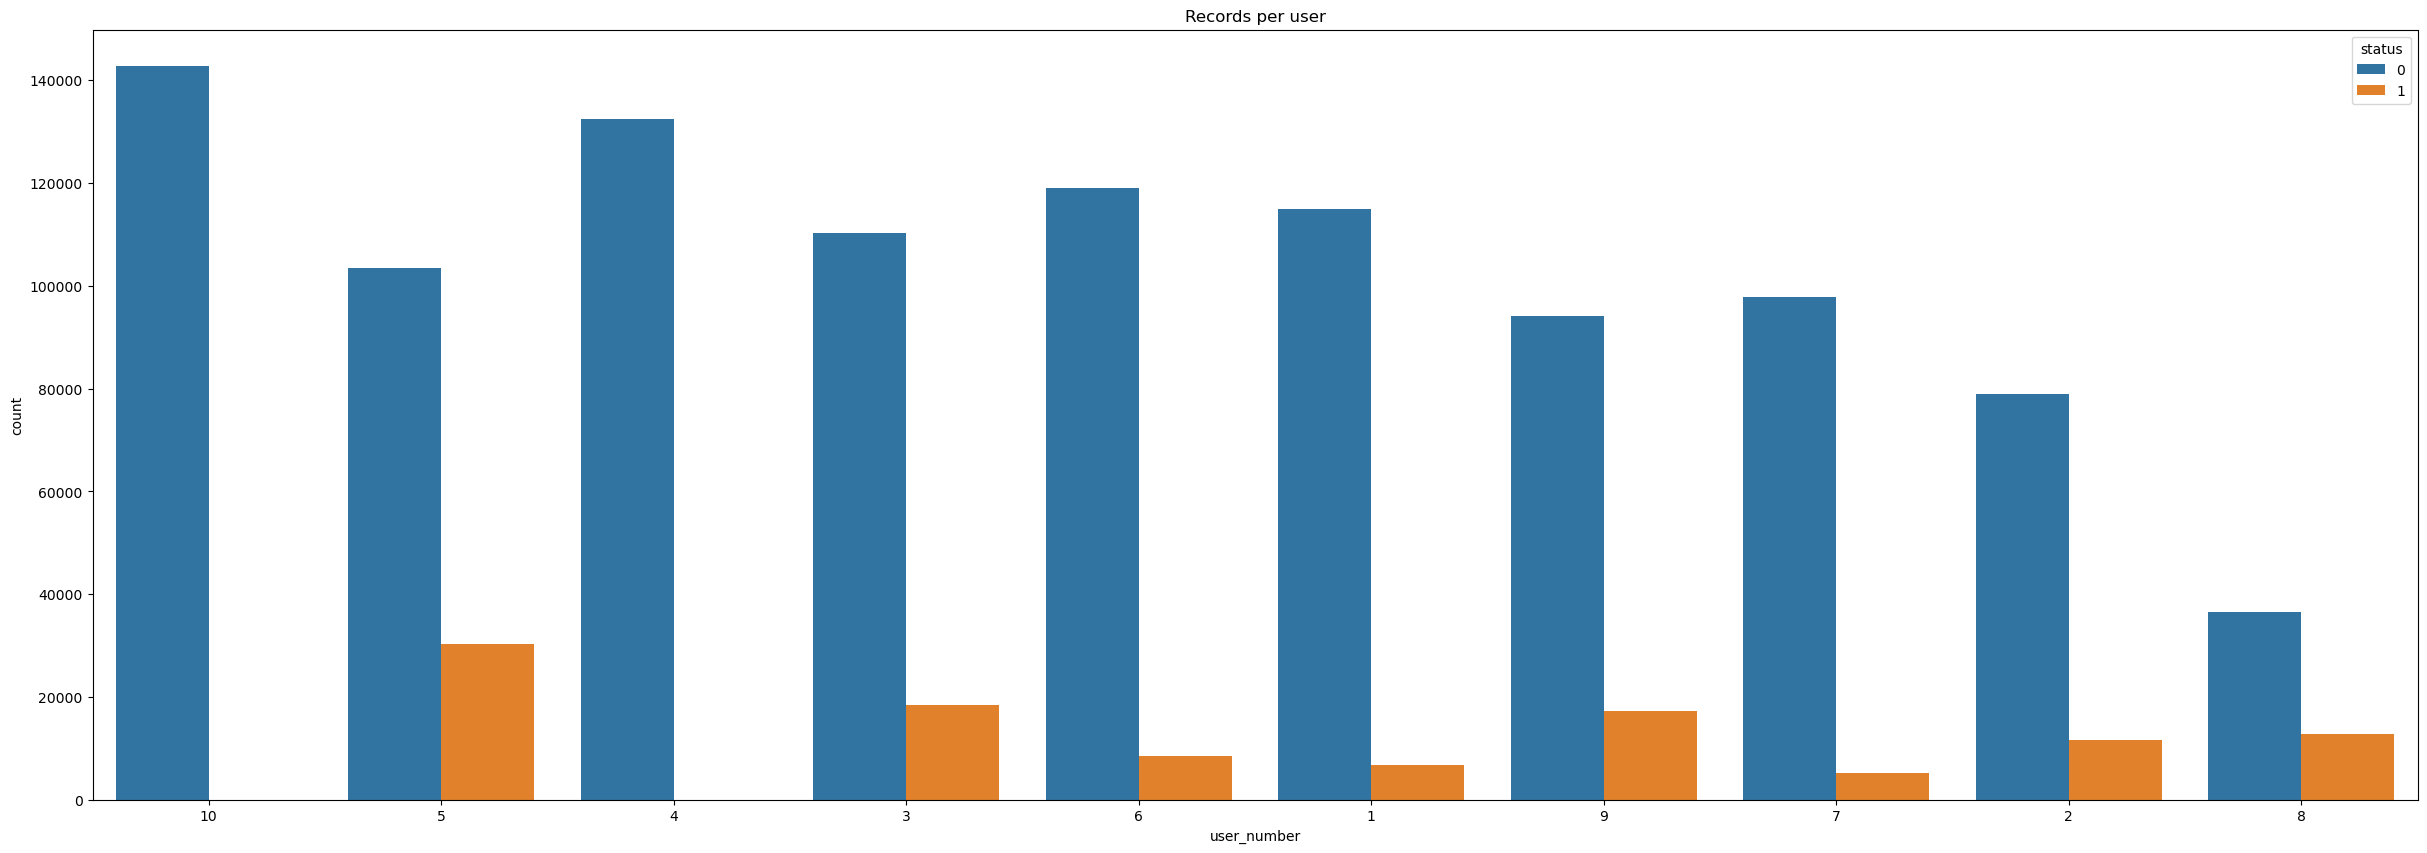

In [14]:
plt.figure(figsize=(30, 10))
sns.countplot(x = "user_number", hue="status", data = df,
              order = df.user_number.value_counts().index)
plt.title("Records per user");

In [13]:
X=df.drop('status',axis=1)
X

,Time,ankle-x,ankle-y,ankle-z,thigh-x,thigh-y,thigh-z,trunk-x,trunk-y,trunk-z,user_number
38399,600000,-353,950,178,172,953,232,87,1000,-116,10
38400,600015,-383,960,198,181,944,212,97,990,-87,10
38401,600031,-363,950,178,190,935,232,97,1000,-116,10
38402,600046,-363,950,198,172,944,202,97,1000,-97,10
38403,600062,-343,960,207,163,944,232,106,1000,-97,10
...,...,...,...,...,...,...,...,...,...,...,...
94075,1469937,343,1009,118,818,481,-50,864,485,203,5
94076,1469953,313,990,128,818,527,-80,844,476,223,5
94077,1469968,333,1000,108,827,500,-20,864,466,194,5
94078,1469984,323,1039,108,836,500,-40,854,457,233,5


In [15]:
X=X.drop('user_number',axis=1)
X

,Time,ankle-x,ankle-y,ankle-z,thigh-x,thigh-y,thigh-z,trunk-x,trunk-y,trunk-z
38399,600000,-353,950,178,172,953,232,87,1000,-116
38400,600015,-383,960,198,181,944,212,97,990,-87
38401,600031,-363,950,178,190,935,232,97,1000,-116
38402,600046,-363,950,198,172,944,202,97,1000,-97
38403,600062,-343,960,207,163,944,232,106,1000,-97
...,...,...,...,...,...,...,...,...,...,...
94075,1469937,343,1009,118,818,481,-50,864,485,203
94076,1469953,313,990,128,818,527,-80,844,476,223
94077,1469968,333,1000,108,827,500,-20,864,466,194
94078,1469984,323,1039,108,836,500,-40,854,457,233


In [16]:
import numpy as np

# 데이터프레임에서 'status' 열을 가져옵니다.
y = df['status']
# 2차원 배열로 변환합니다.
y = np.array(y).reshape(-1, 1)

In [17]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify= y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(730134, 10) (730134, 1)
(228167, 10) (228167, 1)


In [18]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc.fit(y_train)

y_train_hot = enc.transform(y_train) 
y_test_hot = enc.transform(y_test) 
y_val_hot = enc.transform(y_val)

In [19]:
n_features, n_outputs = X_train.shape[1], y_train_hot.shape[1]
n_features , n_outputs

(10, 2)

In [20]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout


# 샘플링 하기전

In [21]:
model = keras.Sequential()
model.add(keras.layers.Dense(50, activation='relu', input_shape=(n_features,)))
model.add(Flatten())
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Metal device set to: Apple M2 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________


2024-04-02 23:35:38.104623: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-02 23:35:38.105059: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [22]:
train_epochs = 10
history = model.fit(X_train, y_train_hot, epochs=train_epochs, verbose=True,  validation_split = 0.2)

Epoch 1/10


2024-04-02 23:35:38.897507: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-02 23:35:39.293567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18254/18254 [==============================] - ETA: 0s - loss: 332.2534 - accuracy: 0.8730

2024-04-02 23:37:13.873876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18254/18254 [==============================] - 110s 6ms/step - loss: 332.2534 - accuracy: 0.8730 - val_loss: 465.8796 - val_accuracy: 0.9035
Epoch 2/10
18254/18254 [==============================] - 102s 6ms/step - loss: 205.5520 - accuracy: 0.8737 - val_loss: 567.5036 - val_accuracy: 0.2122
Epoch 3/10
18254/18254 [==============================] - 104s 6ms/step - loss: 173.1565 - accuracy: 0.8725 - val_loss: 319.9766 - val_accuracy: 0.8686
Epoch 4/10
18254/18254 [==============================] - 104s 6ms/step - loss: 141.8787 - accuracy: 0.8731 - val_loss: 255.2254 - val_accuracy: 0.9033
Epoch 5/10
18254/18254 [==============================] - 92s 5ms/step - loss: 102.0767 - accuracy: 0.8711 - val_loss: 17.9986 - val_accuracy: 0.8509
Epoch 6/10
18254/18254 [==============================] - 99s 5ms/step - loss: 78.5073 - accuracy: 0.8696 - val_loss: 129.2192 - val_accuracy: 0.9032
Epoch 7/10
18254/18254 [==============================] - 91s 5ms/step - loss: 67.2680 - accuracy: 0.87

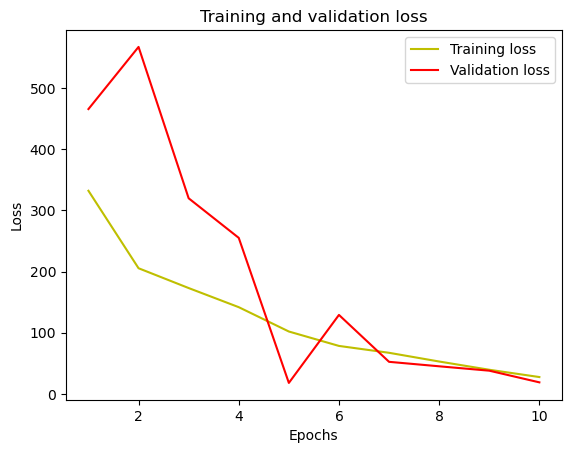

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

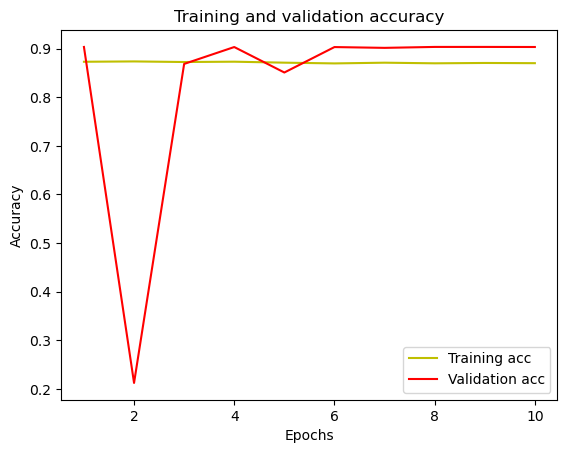

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

7131/7131 [==============================] - 9s 1ms/step
f1_score =  0.8569525901170691
0.9026896965818896
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    206010
           1       0.27      0.00      0.00     22157

    accuracy                           0.90    228167
   macro avg       0.59      0.50      0.48    228167
weighted avg       0.84      0.90      0.86    228167



<Axes: >

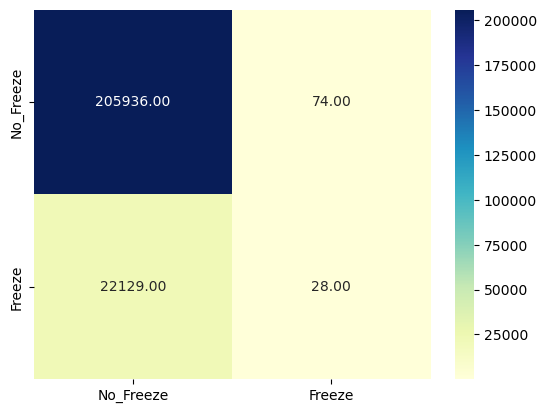

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['No_Freeze','Freeze']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# Smote 사용 - dense

In [27]:
import numpy as np

# 데이터프레임에서 'status' 열을 가져옵니다.
y = df['status']
# 2차원 배열로 변환합니다.


In [28]:
X

,Time,ankle-x,ankle-y,ankle-z,thigh-x,thigh-y,thigh-z,trunk-x,trunk-y,trunk-z
38399,600000,-353,950,178,172,953,232,87,1000,-116
38400,600015,-383,960,198,181,944,212,97,990,-87
38401,600031,-363,950,178,190,935,232,97,1000,-116
38402,600046,-363,950,198,172,944,202,97,1000,-97
38403,600062,-343,960,207,163,944,232,106,1000,-97
...,...,...,...,...,...,...,...,...,...,...
94075,1469937,343,1009,118,818,481,-50,864,485,203
94076,1469953,313,990,128,818,527,-80,844,476,223
94077,1469968,333,1000,108,827,500,-20,864,466,194
94078,1469984,323,1039,108,836,500,-40,854,457,233


In [29]:
from imblearn.over_sampling import SMOTE
from collections import Counter  
# SMOTE 적용
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 샘플링 이전과 이후의 클래스 분포 확인
print("이전 클래스 분포:", Counter(y))
print("샘플링 이후 클래스 분포:", Counter(y_resampled))


이전 클래스 분포: Counter({0: 1030050, 1: 110785})
샘플링 이후 클래스 분포: Counter({0: 1030050, 1: 1030050})


In [30]:
y.value_counts()

status
0    1030050
1     110785
Name: count, dtype: int64

In [31]:
import numpy as np

# y_resampled를 NumPy 배열로 변환
y_resampled_array = np.array(y_resampled)

# NumPy 배열을 2D 배열로 변환
y_resampled = y_resampled_array.reshape(-1, 1)


In [32]:
X_train, X_test,y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, stratify= y_resampled)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify= y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1318464, 10) (1318464, 1)
(412020, 10) (412020, 1)


In [33]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc.fit(y_train)

y_train_hot = enc.transform(y_train) 
y_test_hot = enc.transform(y_test) 
y_val_hot = enc.transform(y_val)

In [34]:
n_features, n_outputs = X_train.shape[1], y_train_hot.shape[1]
n_features , n_outputs

(10, 2)

In [35]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout


In [36]:
model = keras.Sequential()
model.add(keras.layers.Dense(50, activation='relu', input_shape=(n_features,)))
model.add(Flatten())
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                550       
                                                                 
 flatten_1 (Flatten)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________


In [37]:
train_epochs = 10
history = model.fit(X_train, y_train_hot, epochs=train_epochs, verbose=True,  validation_split = 0.2)

Epoch 1/10
    1/32962 [..............................] - ETA: 3:09:42 - loss: 87428.8125 - accuracy: 0.5312

2024-04-02 23:54:29.924634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32962/32962 [==============================] - ETA: 0s - loss: 309.7870 - accuracy: 0.6031

2024-04-02 23:57:18.760956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32962/32962 [==============================] - 195s 6ms/step - loss: 309.7870 - accuracy: 0.6031 - val_loss: 109.8800 - val_accuracy: 0.6877
Epoch 2/10
32962/32962 [==============================] - 196s 6ms/step - loss: 203.4540 - accuracy: 0.6283 - val_loss: 131.5775 - val_accuracy: 0.5426
Epoch 3/10
32962/32962 [==============================] - 162s 5ms/step - loss: 169.2141 - accuracy: 0.6268 - val_loss: 162.3554 - val_accuracy: 0.5414
Epoch 4/10
32962/32962 [==============================] - 161s 5ms/step - loss: 141.7103 - accuracy: 0.6271 - val_loss: 106.8660 - val_accuracy: 0.6714
Epoch 5/10
32962/32962 [==============================] - 160s 5ms/step - loss: 115.8655 - accuracy: 0.6279 - val_loss: 121.4337 - val_accuracy: 0.5963
Epoch 6/10
32962/32962 [==============================] - 162s 5ms/step - loss: 92.1929 - accuracy: 0.6283 - val_loss: 95.9581 - val_accuracy: 0.5007
Epoch 7/10
32962/32962 [==============================] - 160s 5ms/step - loss: 70.0837 - accuracy: 0

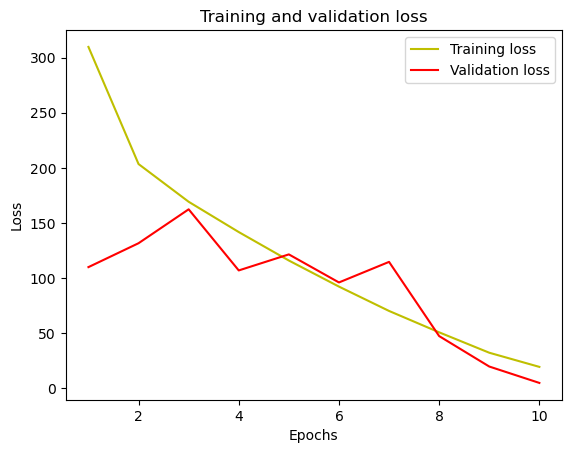

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

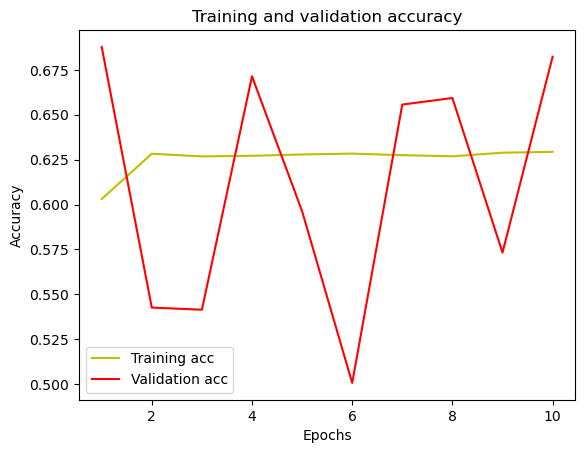

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

  103/12876 [..............................] - ETA: 19s

2024-04-03 00:29:38.747416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12876/12876 [==============================] - 17s 1ms/step
f1_score =  0.681007552562497
0.6818916557448668
              precision    recall  f1-score   support

           0       0.70      0.63      0.66    206010
           1       0.66      0.73      0.70    206010

    accuracy                           0.68    412020
   macro avg       0.68      0.68      0.68    412020
weighted avg       0.68      0.68      0.68    412020



<Axes: >

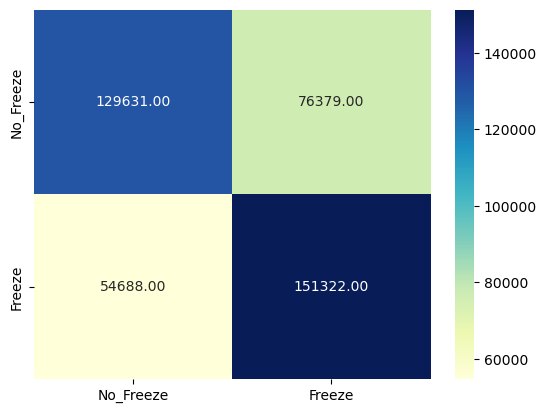

In [40]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['No_Freeze','Freeze']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [41]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_data, y_data = create_dataset(df[['Time', 'ankle-x', 'ankle-y', 'ankle-z', 
            'thigh-x', 'thigh-y', 'thigh-z',
            'trunk-x', 'trunk-y', 'trunk-z']], df.status, TIME_STEPS,
                                  STEP)

X_train, X_test,y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, stratify=  y_data )
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify=  y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18249, 200, 10) (18249, 1)
(5704, 200, 10) (5704, 1)


# smote 사용 - CNN

In [42]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse_output = False)
enc = enc.fit(y_train)

y_train_hot = enc.transform(y_train)
y_test_hot = enc.transform(y_test)
y_val_hot = enc.transform(y_val)

print(X_train.shape, y_train_hot.shape, X_test.shape, y_test_hot.shape)

(18249, 200, 10) (18249, 2) (5704, 200, 10) (5704, 2)


In [43]:
n_timesteps,n_features,n_outputs= X_train.shape[1],X_train.shape[2],y_train_hot.shape[1]
n_timesteps,n_features,n_outputs

(200, 10, 2)

In [44]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 198, 64)           1984      
                                                                 
 dropout (Dropout)           (None, 198, 64)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 64)           0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 6336)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               811136    
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                      

In [45]:
epochs, batch_size = 10, 128
history = model.fit(X_train, y_train_hot, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_val, y_val_hot), shuffle=True)

Epoch 1/10


2024-04-03 00:36:16.841230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


143/143 [==============================] - ETA: 0s - loss: 45224.7617 - accuracy: 0.8877

2024-04-03 00:36:19.357862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


143/143 [==============================] - 3s 15ms/step - loss: 45224.7617 - accuracy: 0.8877 - val_loss: 17609.8828 - val_accuracy: 0.9047
Epoch 2/10
143/143 [==============================] - 1s 9ms/step - loss: 6527.3438 - accuracy: 0.8888 - val_loss: 338.7121 - val_accuracy: 0.9044
Epoch 3/10
143/143 [==============================] - 1s 9ms/step - loss: 1724.6892 - accuracy: 0.8820 - val_loss: 218.8755 - val_accuracy: 0.9040
Epoch 4/10
143/143 [==============================] - 1s 10ms/step - loss: 198.2093 - accuracy: 0.8865 - val_loss: 29.8719 - val_accuracy: 0.8948
Epoch 5/10
143/143 [==============================] - 1s 9ms/step - loss: 42.9478 - accuracy: 0.8685 - val_loss: 28.4464 - val_accuracy: 0.8832
Epoch 6/10
143/143 [==============================] - 1s 9ms/step - loss: 29.6558 - accuracy: 0.8653 - val_loss: 30.1643 - val_accuracy: 0.8957
Epoch 7/10
143/143 [==============================] - 1s 9ms/step - loss: 19.9263 - accuracy: 0.8673 - val_loss: 25.1408 - val_accur

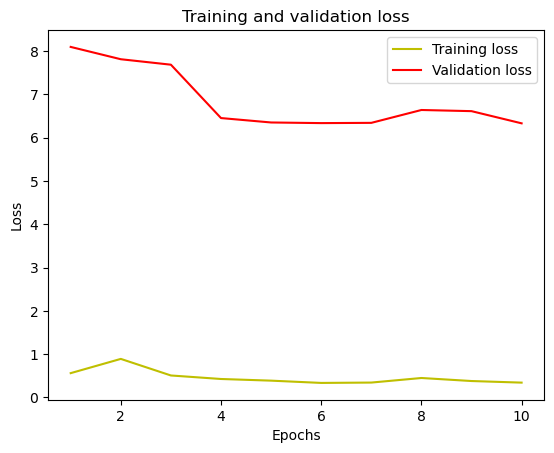

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

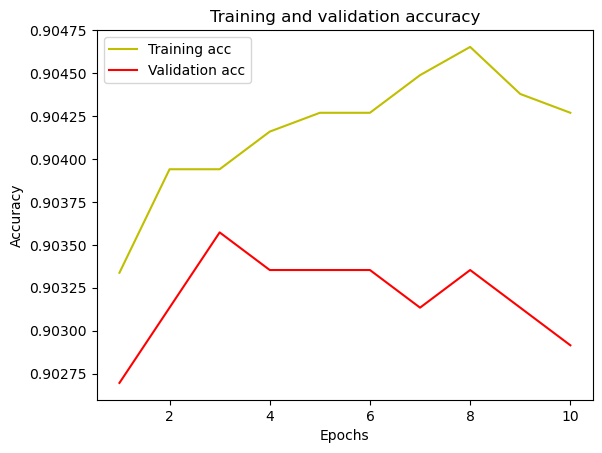

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 94/179 [==============>...............] - ETA: 0s

2024-04-03 00:38:12.705087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


179/179 [==============================] - 1s 6ms/step
f1_score =  0.8591553915073279
0.9042776998597476
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      5160
           1       0.00      0.00      0.00       544

    accuracy                           0.90      5704
   macro avg       0.45      0.50      0.47      5704
weighted avg       0.82      0.90      0.86      5704



<Axes: >

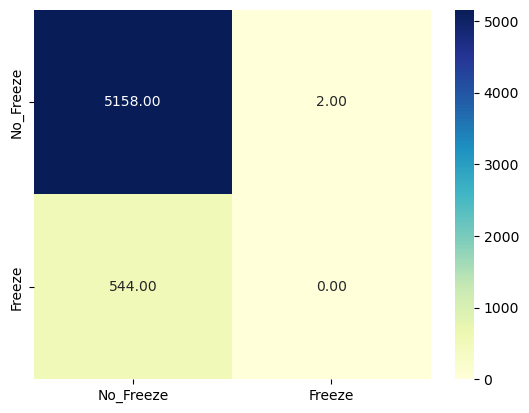

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['No_Freeze','Freeze']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')